# 1. Simulate the Central Limit Theorem in any programming language. “The Central Limit Theorem states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution". (25 points)

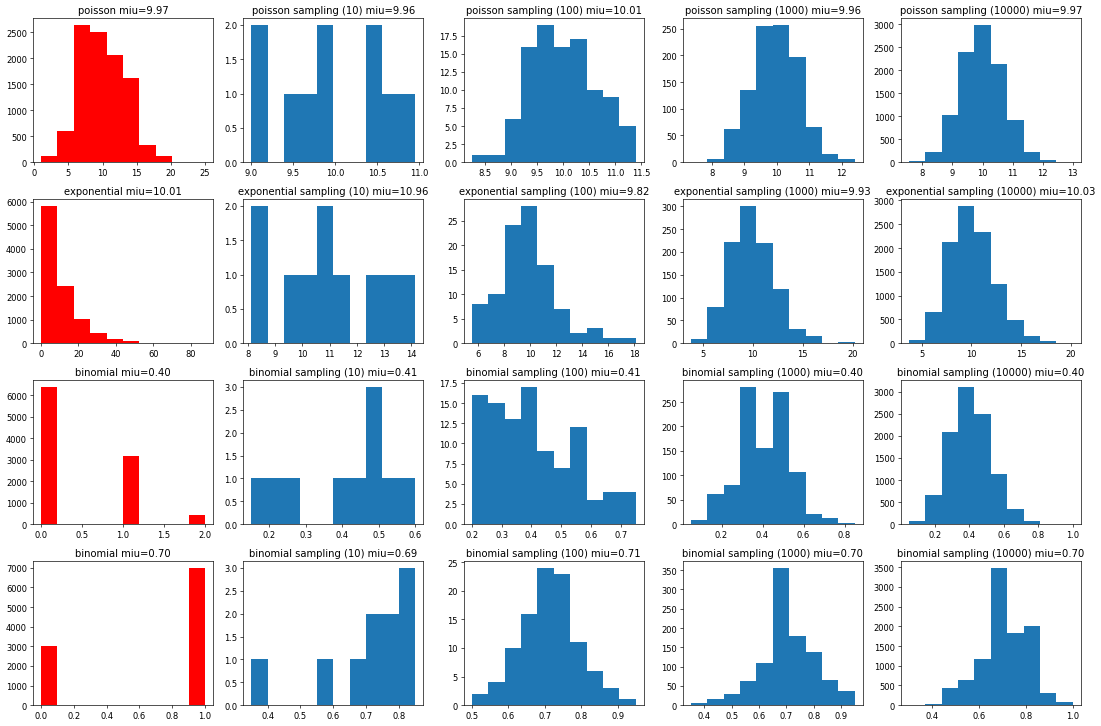

In [1]:
import numpy as np
import pandas as pd
from numpy import *
from scipy.stats import binom, norm, normaltest, ttest_ind, stats, wilcoxon, mannwhitneyu
import matplotlib.pyplot as plt

def func(i, j, n, dist):
    # plot
    ax = fig.add_subplot(gs[i, 0])
    ax.hist(dist, color="r")
    ax.set_title('%s miu=%.2f' % (n, dist.mean()))
    for _, r in enumerate(stops):
        mm = []
        for _ in range(r):
            mm.append(np.random.choice(dist, 20).mean())
        ax = fig.add_subplot(gs[i, j])
        ax.hist(mm)
        ax.set_title('%s sampling (%d) miu=%.2f' % (n, len(mm), np.array(mm).mean()))
        j += 1
    pass


stops = np.array([10, 100, 1000, 10000])
rows, cols = 4, len(stops)
fig = plt.figure(figsize=(18, 12), dpi=60, constrained_layout=True)
gs = plt.GridSpec(rows, cols + 1, figure=fig, left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
func(0, 1, 'poisson', np.random.poisson(10, stops[-1]))
func(1, 1, 'exponential', np.random.exponential(10, stops[-1]))
func(2, 1, 'binomial', np.random.binomial(2, 0.2, stops[-1]))
func(3, 1, 'binomial', np.random.binomial(1, 0.7, stops[-1]))

***
### `Answer:`

The first column shows the original distributions. The rest columns statistics the distribution of means of sampling in different retry times from 10,100,1000, to 10000

The graphic illustrated the Central Limit Theorem, which states that regardless of the original distribution, the mean value distribution of a random sample taken from sample space S(X) corresponds to a normal distribution with the same mean value.

***

# 2. Construct the binomial distribution for the total number of heads in four flips of a balanced coin. Define the PMF(Probability Mass Function) of the following distribution.(15 points)


***
### `Answer:`

#### The distribution of head numbers of 4 flips:

| number of heads | coin combinations |
| :- | :-: |
|0 |TTTT
|1 |HTTT,THTT,TTHT,TTTH
|2 |HHTT,HTHT,THHT,TTHH,HTTH,THTH
|3 |HHHT,HHTH,HTHH,THHH
|4 |HHHH

#### The Defination of the PMF  :

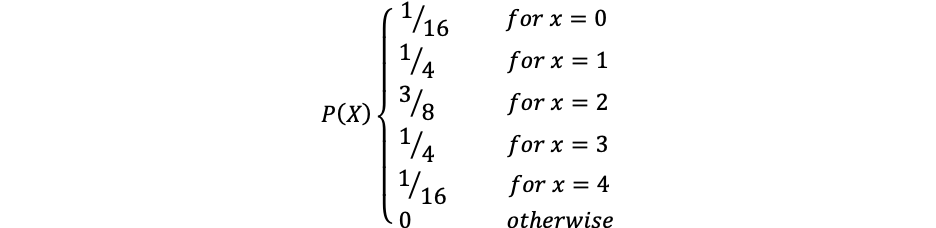

#### The experimental distribution by python:
***

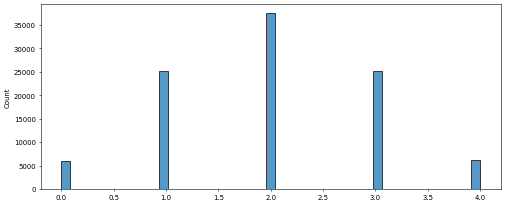

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
m = []
for _ in range(100000):
    m.append(np.random.binomial(1, 0.5, 4).sum())
plt.show()

fig = plt.figure(figsize=(10, 4), dpi=50, constrained_layout=True)
sns.histplot(m)
plt.show()

# 3. Suppose that 40% of the voters in a city are in favor of a ban of smoking in public buildings. Suppose 5 voters are to be randomly sampled. Find the probability that (10 points):

This is a random sampling scheme without replacement.

## 3.1. 2 favor the ban.
***
### `Answer:`
* Applying the PDF Function to solve this problem: 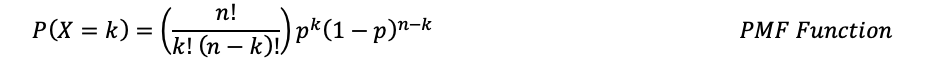

$P(k=2; n=5, p=0.4)$

$= 10\times0.4^2\times0.6^3$

$= 10\times0.16\times0.218$

**`= 0.3456`**
***

In [3]:
# for self-check
from scipy.stats import binom
print("P(X=2) %.6f" % binom.pmf (2, 5, 0.4))

P(X=2) 0.345600


## 3.2. less than 4 favor the ban.
***
### `Answer:`
* Applying the CDF function to solve this problem: 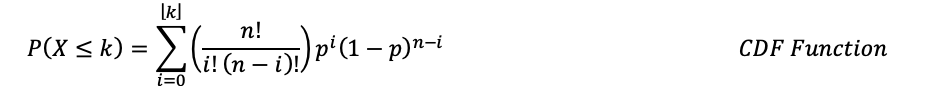

Applying CDF Function to solve this problem:

$P(X<4)$

$= P(X=0) + P(X=1) + P(X=2) + P(X=3)$

$= 0.07776 + 0.2592 + 0.3456 + 0.2304$

**`= 0.91296`**
***

In [4]:
# for self-check
from scipy.stats import binom
print("P(X<4) %.6f = %.6f" % (binom.cdf (3, 5, 0.4), 0.07776 + 0.2592 + 0.3456 + 0.2304))

P(X<4) 0.912960 = 0.912960


## 3.3. at least 1 favor the ban.
***
### `Answer:`
$\because P(X\le5) = 1$

$\therefore P(X\ge1)$

$= 1-P(X=0)$

$= 1-0.07776$ 

`= 0.92224`
***

In [5]:
# for self-check
from scipy.stats import binom
print("P(X>=1) %.6f" % (1 - binom.cdf (0, 5, 0.4)))

P(X>=1) 0.922240


<AxesSubplot:ylabel='Proportion'>

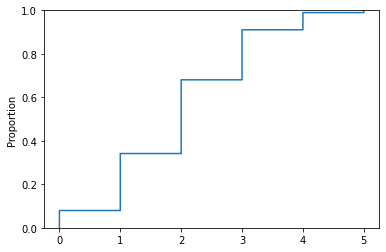

In [6]:
# Binomial CDF Visualization
sns.ecdfplot(np.random.binomial(5, 0.4, 10000))

# 4. Most graduate schools of business require applicants for admission to take the SAT examination. Scores on the SAT are roughly normally distributed with a mean of 530 and a standard deviation of 110. What is the probability of an individual scoring above 500 on the SAT? (15 points)

***
### `Answer:`

This equals to $1-CDF_{norm}(X<=500)$

$\because X \sim Normal(530, 110)$

$Let  Z=(X-\mu)\div\sigma=(500-530)\div110=-0.27$

Searching on Z-Table: $P(Z)=P(-0.27)=0.39358$

$\therefore 1-P(Z)=1-0.39358=0.60642$

`=60.64%`
***

In [7]:
# self-check
import scipy.integrate as si
print(1 - norm.cdf(500, 530, 110))

0.6074685657262202


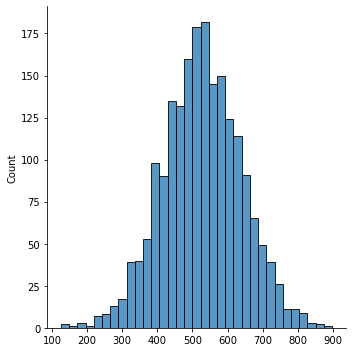

In [8]:
x = np.random.normal(loc=530, scale=110, size=2000)
sns.displot(x)

# 5. The Edwards’s Theater chain has studied its movie customers to determine how much money they spend on concessions. The study revealed that the spending distribution is approximately normally distributed with a mean of 4.11 dollar and a standard deviation of 1.37 dollar. What percentage of customers will spend less than 3.00 dollar on concessions?(10 points)

***
### `Answer:`

$\because X \sim Normal(4.11, 1.37)$

$Let Z=(X-\mu)\div\sigma=(3.00-4.11)\div1.37=-0.81$

$CDF_{norm}(X<3)=P(Z<-0.81)$

$\therefore Searching Z-Table: P(Z=-0.81)=0.20897$

As an estimation, there are `20.90%` of customers will spend less than 3.00 dollar on concessions.
***

In [9]:
# self-check
import scipy.integrate as si
print("P(X<3.00) = %.6f"%norm.cdf(3, 4.11, 1.37))

P(X<3.00) = 0.208907


# 6. A data scientist is testing a new model. She choose train and test sets at random from a large population of training data. She randomly choose 8 fold validation to get the accuracy for decision tree model, and choose 5 fold cross validation to get the accuracy for Logistic regression. The data are below: (25 points)
- Decision Trees: 93,94,89,88,78,89,76,98
- Logistic Regression: 78,90,89,76,89

1. Are the two populations paired or independent? Explain your answer.
2. Graph the data as you see fit. Why did you choose the graph(s) that you did and what does it (do they) tell you?
3. Choose a test appropriate for the hypothesis above, and justify your choice based on your answers to parts (a) and (b). Then perform the test by computing a p-value, and making a reject or not reject decision. Do use python or any programming language for this, and show your work. Finally, state your conclusion in the context of the problem.

### 6.0. Data preparation

In [10]:
n1 = np.array([93,94,89,88,78,89,76,98])
n2 = np.array([78,90,89,76,89])
print("Decision Tree      : %.3f (+/-)%.3f"%(n1.mean(), n1.std()))
print("Logistic Regression: %.3f (+/-)%.3f"%(n2.mean(), n2.std()))

Decision Tree      : 88.125 (+/-)7.132
Logistic Regression: 84.400 (+/-)6.086


### 6.1. Are the two populations paired or independent? Explain your answer.
***
### `Answer:`

Because of Central Limit Theorem 

$$Given\ X \sim PDF(\mu)\ \ \ 𝐸[\![𝑋]\!] = \mu$$

$$Mean(samples)\sim Normal(E[\![X]\!], \sigma)$$

We can apply hypothesis testing on two sets of samples to test whether they are independent or related no matter what PDF do they obey. Before start a parametric hypothesis testing, we need to know the statistic mean of the sample set. But Central Limit Theorem holds **especially true for sample sizes over 30**. So the accuracy scores' sample size should be noticed because there are not enough observations on both RV: one of them contains eight observations, the other contains five. As a result, **non-parametric hypothesis testing** should be considered.

* One of the best idea is consider $X\in('Logistic\ Regression',\ 'Decision\ Trees')$ and $Y\in('Positive\ Accuracy','Nagetive\ Accuracy')$. Then applying **Chi-Square Test of independence**.
* Another option is to consider two sets of accuracy scores as two sequences and applying **Mann-Whitney Test of Independence** – It is a non-parametric version of the t-test for independent samples. When the means of samples from the populations are not for sure normally distributed, or the sample size are not balanced, Mann-Whitney U Test is a good choice.

As an experiencial <font color='red'>conclusion</font> to this answer: 

| model | accuracy | deviation |
| :- | -: | :-: |
| Decision Tree | 88.125 | (+/-) 7.132
| Logistic Regression | 84.400 | (+/-) 6.086

The two populations of accuracy scores are **dependent** because of the approximate sample means and standard deviations, which means **the performance of those two models are not different from each other**.
***

### 6.2. Graph the data as you see fit. Why did you choose the graph(s) that you did and what does it (do they) tell you?

***
### `Answer:`

Decision Tree Model has a higher average score than Logistic Regression from the boxplot. The maximum observation score of Decision Tree Model is much more higher than Logistic Regression. That means **sometimes Decision Trees may have a better performance**, but we need some statistic proves to support our guess on this: <font color='red'>are we going to deploy and use Decision Tree as the final choice</font>?

Besides that, although we can calculate the statistic means for each set of populations, more samples(>30) are needed to apply parametric hypothesis testing methods.
***

<AxesSubplot:>

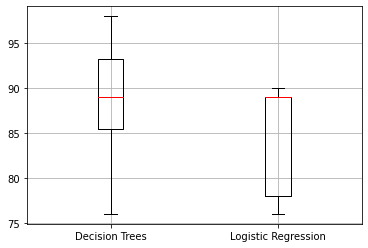

In [11]:
tmp = pd.DataFrame({'Decision Trees':n1})
tmp['Logistic Regression'] = pd.DataFrame(n2)
tmp. boxplot(color=dict(boxes='black', whiskers='black', medians='r', caps='black'))

### 6.3. Choose a test appropriate for the hypothesis above, and justify your choice based on your answers to parts (a) and (b). Then perform the test by computing a p-value, and making a reject or not reject decision. Do use python or any programming language for this, and show your work. Finally, state your conclusion in the context of the problem.

#### 6.3.1. **`Mann-Whitney Test of Independence`**
***
* Null Hypotheses **`H0`**: Two populations are equal
* Alternative Hypotheses **`H1`**: Two populations are not equal.
***

In [12]:
from scipy.stats import binom, norm, normaltest, ttest_ind, stats, wilcoxon, mannwhitneyu
print(mannwhitneyu(n1, n2, method='exact'))

MannwhitneyuResult(statistic=25.0, pvalue=0.5236985236985237)


***
### `Answer:`

We can reject $H_{0}$ at certain significant level when $U_{calculated} \le U_{critical}$ after searching Mann-Whitney table(For two-tailed test)

For this experiment $len(n1)=8$, $len(n2)=6$, we find $U_{critical}$=8 from the table

$\because$ $U_{calculated} = 25 > U_{critical}$

$\therefore H_{0}$ is accepted at α=0.05 significant level. **Two populations are equal**. That means **the 

performance of those two models are not different from each other by Mann-Whitney Test of Independence**.

Mann-Whitney table: For two-tailed test. Level of significance: α=0.05
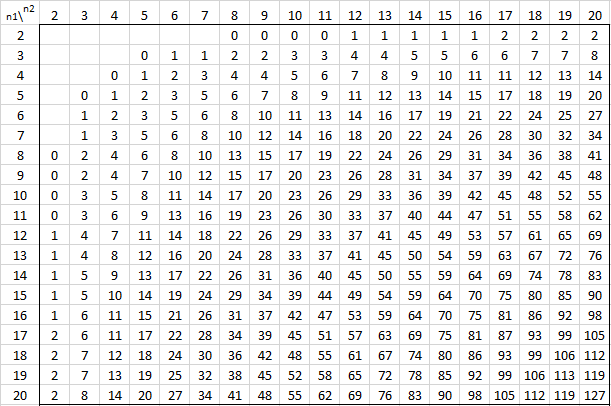

*https://www.real-statistics.com/statistics-tables/mann-whitney-table/
***

#### 6.3.2. **`Chi-Square Test of Independence`**
***
* Null hypothesis **`H0`**: There is no association between two categorical variables
* Alternative hypothesis **`H1`**: There  is a significant association between two categorical variables

For $X\in('LR',\ 'DT')$, $Y\in('Positive','Nagetive')$, **if H0 is rejected, one model will performs much better than the other at 1-$\alpha$ significant level**.
***

In [13]:
# create a table of chi-square test of independence
df = pd.DataFrame({'Model':np.array(['DT','LR'])})
df['Positive'] = np.array([n1.mean(),n2.mean()])
df['Negative'] = 100 - df['Positive']
df = df.set_index(['Model'], inplace=False)

***
##### what we are going to do is apply this matrix on chi2_square test

* First we construct a <font color='red'>Contingency table</font> for further analysis.

| model | positive | negative |
| :- | -: | :-: |
| DT | 88.125 | 11.875
| LR | 84.400 | 15.600

* According to the description that "she chose train and test sets at random from a wide population of training data.", we can infer a conclusion that sample set fom each model training are **Independent Identically Distributed**. Though, applying <font color='red'>Contingency Table Analysis</font> on **classification model selection** becomes possible. 
* If $H_0$ is not rejected at $\alpha$ significant level, we may have 1-$\alpha$ confidence to believe that there is no significant difference on these models.
***

       Positive  Negative
Model                    
DT       88.125    11.875
LR       84.400    15.600


Text(0.5, 1.0, 'heatmap')

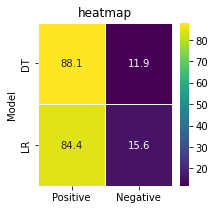

In [14]:
print(df)
plt.figure(figsize=(3, 3))
sns.heatmap(df, annot=True, linewidths=.5, fmt='.1f', cmap="viridis")
plt.title("heatmap")

In [15]:
from scipy.stats import binom, norm, normaltest, ttest_ind, stats, wilcoxon, mannwhitneyu, chi2_contingency
chi2_contingency(df)

(0.3133092894846233,
 0.5756565373286506,
 1,
 array([[86.2625, 13.7375],
        [86.2625, 13.7375]]))

***
### `Answer:`

Let α = 0.05 and use degrees of freedom r = 1 searching on the Chi-Square Table, determining the chi-square value where the row and the probability α column intersect. Then x=3.841 is applied.

$X^{2}_{critical}(r|\alpha=0.05)=3.841$

$X_{calculated}=0.313$

$X_{critical}=3.841$

$X_{calculated}<X_{critical}$, $H_{0}$ $ is accepted

This means **`the performance of those two models are not different from each other`**

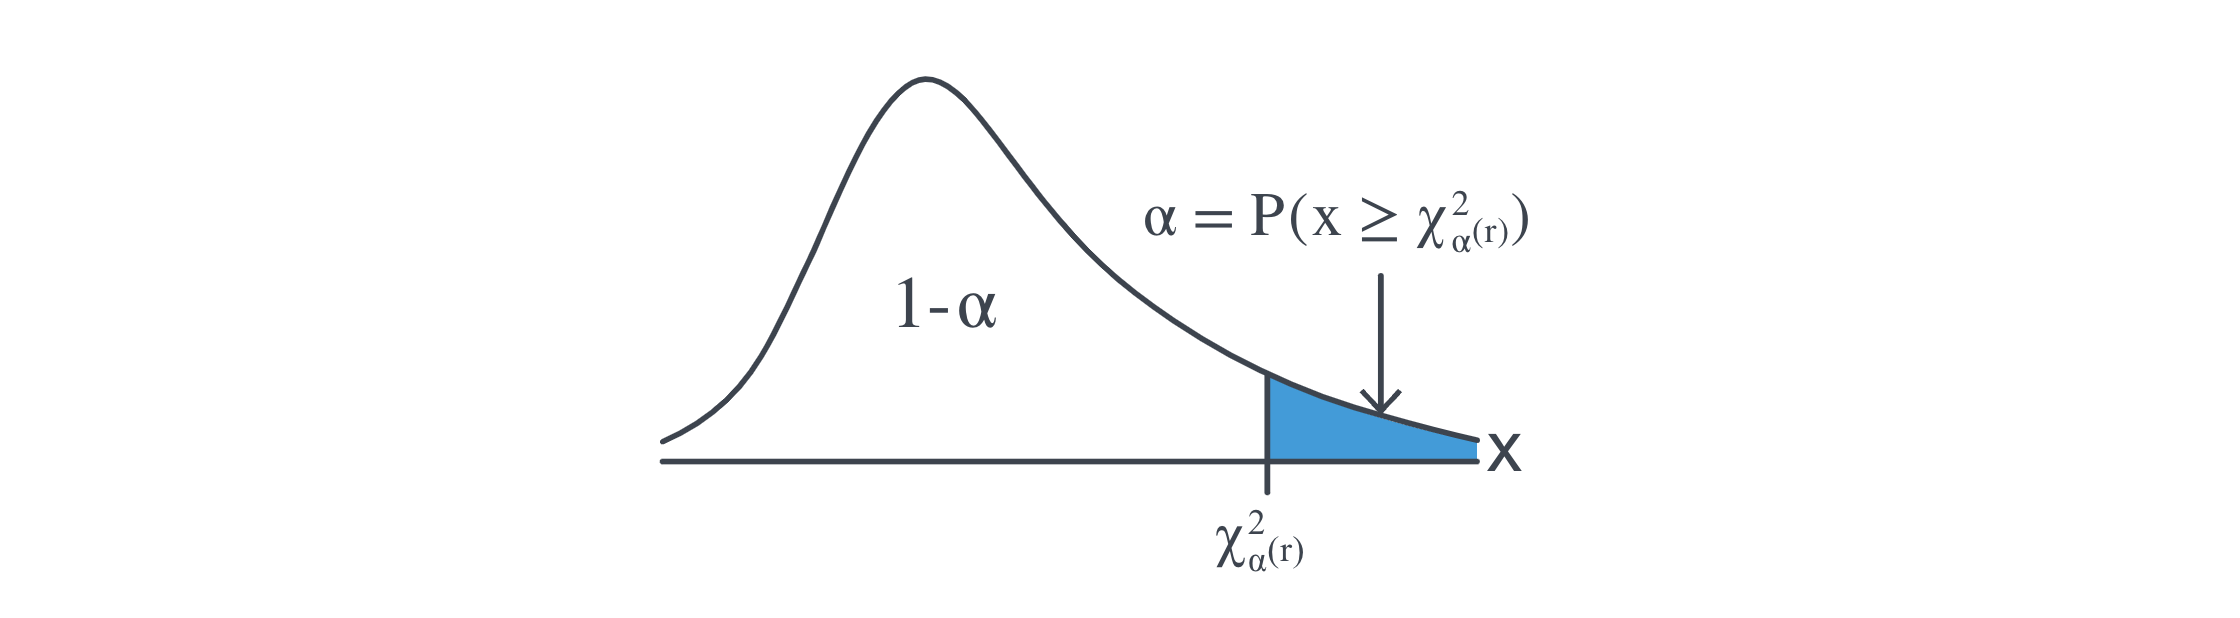

*https://people.richland.edu/james/lecture/m170/tbl-chi.html
***

### 6.4 conclusion

***
### `Answer:`

I applied 2 non-parametric hypothesis testing methods on this problem. And got the same conclusion at a 95% significant level that <font color='red'>the performances of these two models don't differ much from one another</font>.
***